In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
test = pd.read_csv("test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
len(test['Product_ID'].unique())

3491

In [7]:
test.shape

(233599, 11)

In [8]:
train.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [9]:
print('Product_Category_2', train['Product_Category_2'].unique())

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]


In [10]:
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', train['Product_Category_3'].unique())

-----------------------------------------------------------------------------------
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [11]:
# Filling Nan values with O
train.fillna(value=0,inplace=True)

In [12]:
# Converting product categories to int from float.
train['Product_Category_2'] = train['Product_Category_2'].astype(int)
train['Product_Category_3'] = train['Product_Category_3'].astype(int)

In [13]:
print('Product_Category_2', train['Product_Category_2'].unique())
print('-----------------------------------------------------------------------------------')
print('Product_Category_3', train['Product_Category_3'].unique())

Product_Category_2 [ 0  6 14  2  8 15 16 11  5  3  4 12  9 10 17 13  7 18]
-----------------------------------------------------------------------------------
Product_Category_3 [ 0 14 17  5  4 16 15  8  9 13  6 12  3 18 11 10]


C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

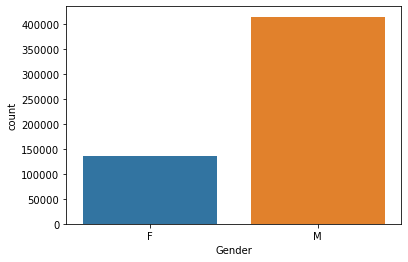

In [14]:
sns.countplot(train['Gender'])

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

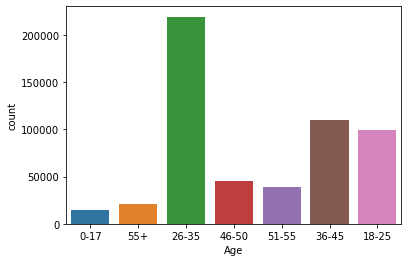

In [15]:
sns.countplot(train['Age'])

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

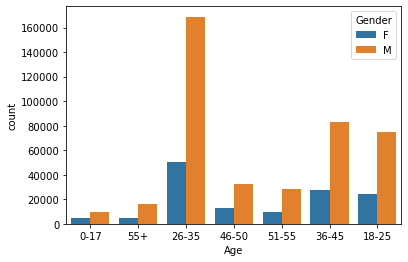

In [16]:
sns.countplot(train['Age'],hue=train['Gender'])

In [17]:
train['Combined_G_M'] = train.apply(lambda x:'%s_%s'%(x['Gender'],x['Marital_Status']),axis=1)

In [18]:
train['Combined_G_M'] 

0         F_0
1         F_0
2         F_0
3         F_0
4         M_0
         ... 
550063    M_1
550064    F_0
550065    F_1
550066    F_0
550067    F_1
Name: Combined_G_M, Length: 550068, dtype: object

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

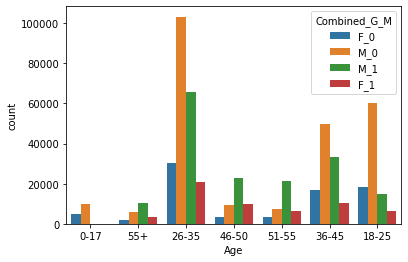

In [19]:
sns.countplot(train['Age'],hue=train['Combined_G_M'])

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

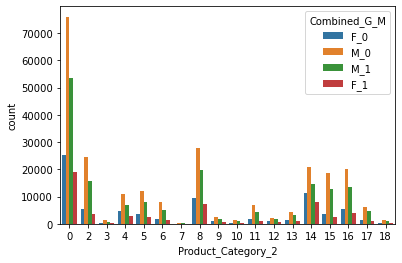

In [20]:
sns.countplot(train['Product_Category_2'],hue=train['Combined_G_M'])

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

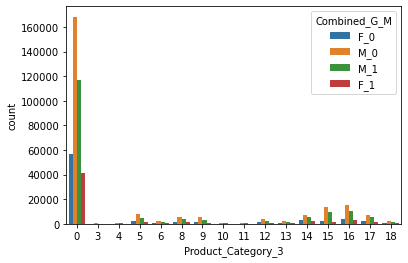

In [21]:
sns.countplot(train['Product_Category_3'],hue=train['Combined_G_M'])

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

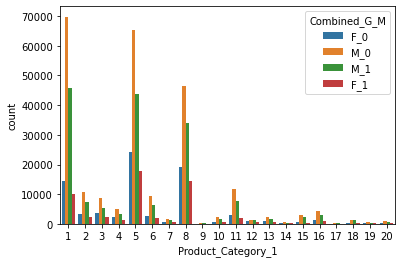

In [22]:
sns.countplot(train['Product_Category_1'],hue=train['Combined_G_M'])

In [23]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Combined_G_M'],
      dtype='object')

In [24]:
train_by_occupation_and_categories = train.groupby(['Occupation','Product_Category_1']).count().reset_index('Product_Category_1')

In [25]:
train_by_occupation_and_categories

,Product_Category_1,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase,Combined_G_M
Occupation,,,,,,,,,,,,
0,1,17643,17643,17643,17643,17643,17643,17643,17643,17643,17643,17643
0,2,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971
0,3,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635,2635
0,4,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481,1481
0,5,18985,18985,18985,18985,18985,18985,18985,18985,18985,18985,18985
...,...,...,...,...,...,...,...,...,...,...,...,...
20,16,584,584,584,584,584,584,584,584,584,584,584
20,17,46,46,46,46,46,46,46,46,46,46,46
20,18,180,180,180,180,180,180,180,180,180,180,180


In [26]:
len(train['Occupation'].unique())

21

In [27]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Combined_G_M
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969,M_0
5,1000003,P00193542,M,26-35,15,A,3,0,1,2,0,15227,M_0
6,1000004,P00184942,M,46-50,7,B,2,1,1,8,17,19215,M_1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15,0,15854,M_1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16,0,15686,M_1
9,1000005,P00274942,M,26-35,20,A,1,1,8,0,0,7871,M_1


<AxesSubplot:xlabel='Purchase', ylabel='Count'>

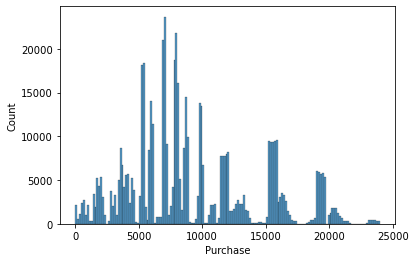

In [28]:
sns.histplot(data=train,x='Purchase')

In [29]:
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Combined_G_M'],
      dtype='object')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

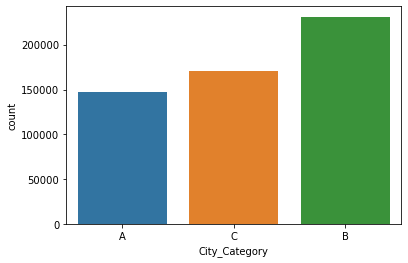

In [30]:
sns.countplot(x='City_Category',data=train)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

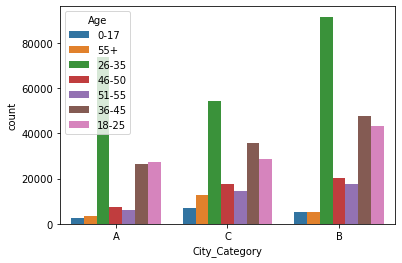

In [31]:
sns.countplot(x='City_Category',hue='Age',data=train)

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

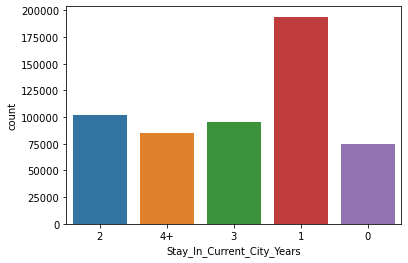

In [32]:
sns.countplot(x='Stay_In_Current_City_Years',data=train)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

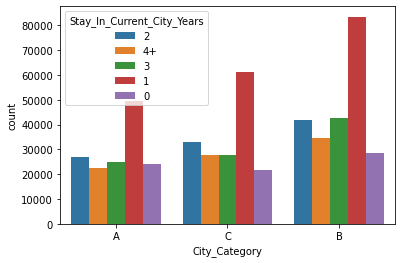

In [33]:
sns.countplot(x='City_Category',hue='Stay_In_Current_City_Years',data=train)

In [34]:
len(train['Occupation'].unique())

21

<AxesSubplot:xlabel='Occupation', ylabel='count'>

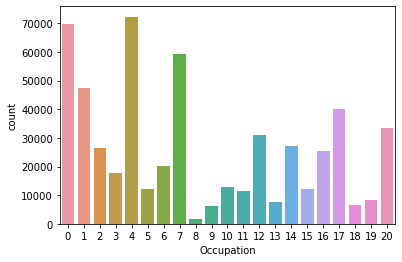

In [35]:
sns.countplot(data=train,x='Occupation')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

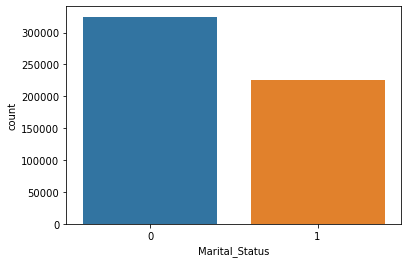

In [36]:
sns.countplot(data=train,x='Marital_Status')

<AxesSubplot:xlabel='City_Category', ylabel='count'>

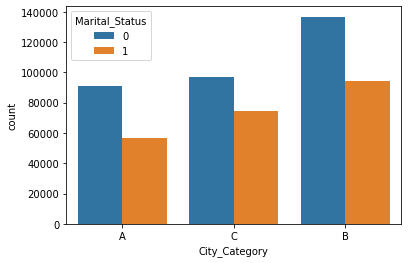

In [37]:
sns.countplot(x='City_Category',hue='Marital_Status',data=train)

<AxesSubplot:xlabel='Age', ylabel='count'>

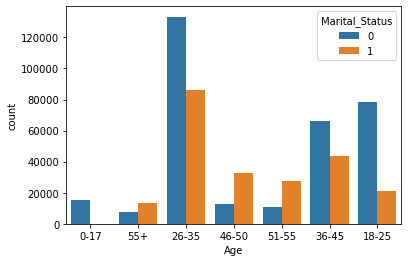

In [38]:
sns.countplot(x='Age',hue='Marital_Status',data=train)

C:\Users\rkbis\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

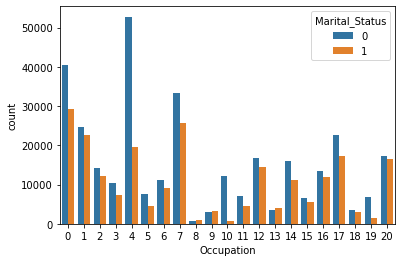

In [39]:
sns.countplot(train['Occupation'],hue=train['Marital_Status'])

In [40]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
train['Gender'] = train['Gender'].apply(map_gender)

In [41]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
train['Age'] = train['Age'].apply(map_age)

In [42]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
train['City_Category'] = train['City_Category'].apply(map_city_categories)

In [43]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
#             current_years = stay
#             current_years = current_years.astype(int)
#             return current_years
train['Stay_In_Current_City_Years'] = train['Stay_In_Current_City_Years'].apply(map_stay)    

In [44]:
cols = ['User_ID','Product_ID','Combined_G_M']
train.drop(cols, inplace = True, axis =1)

In [45]:
train.head(10)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,2,2,0,3,0,0,8370
1,0,0,10,2,2,0,1,6,14,15200
2,0,0,10,2,2,0,12,0,0,1422
3,0,0,10,2,2,0,12,14,0,1057
4,1,6,16,0,4,0,8,0,0,7969
5,1,2,15,2,3,0,1,2,0,15227
6,1,4,7,1,2,1,1,8,17,19215
7,1,4,7,1,2,1,1,15,0,15854
8,1,4,7,1,2,1,1,16,0,15686
9,1,2,20,2,1,1,8,0,0,7871


<AxesSubplot:>

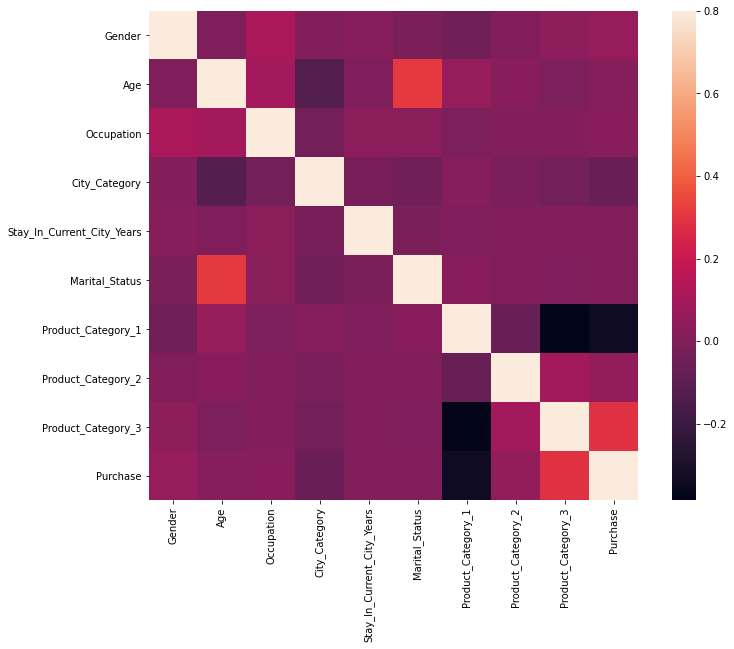

In [46]:
corrmat = train.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

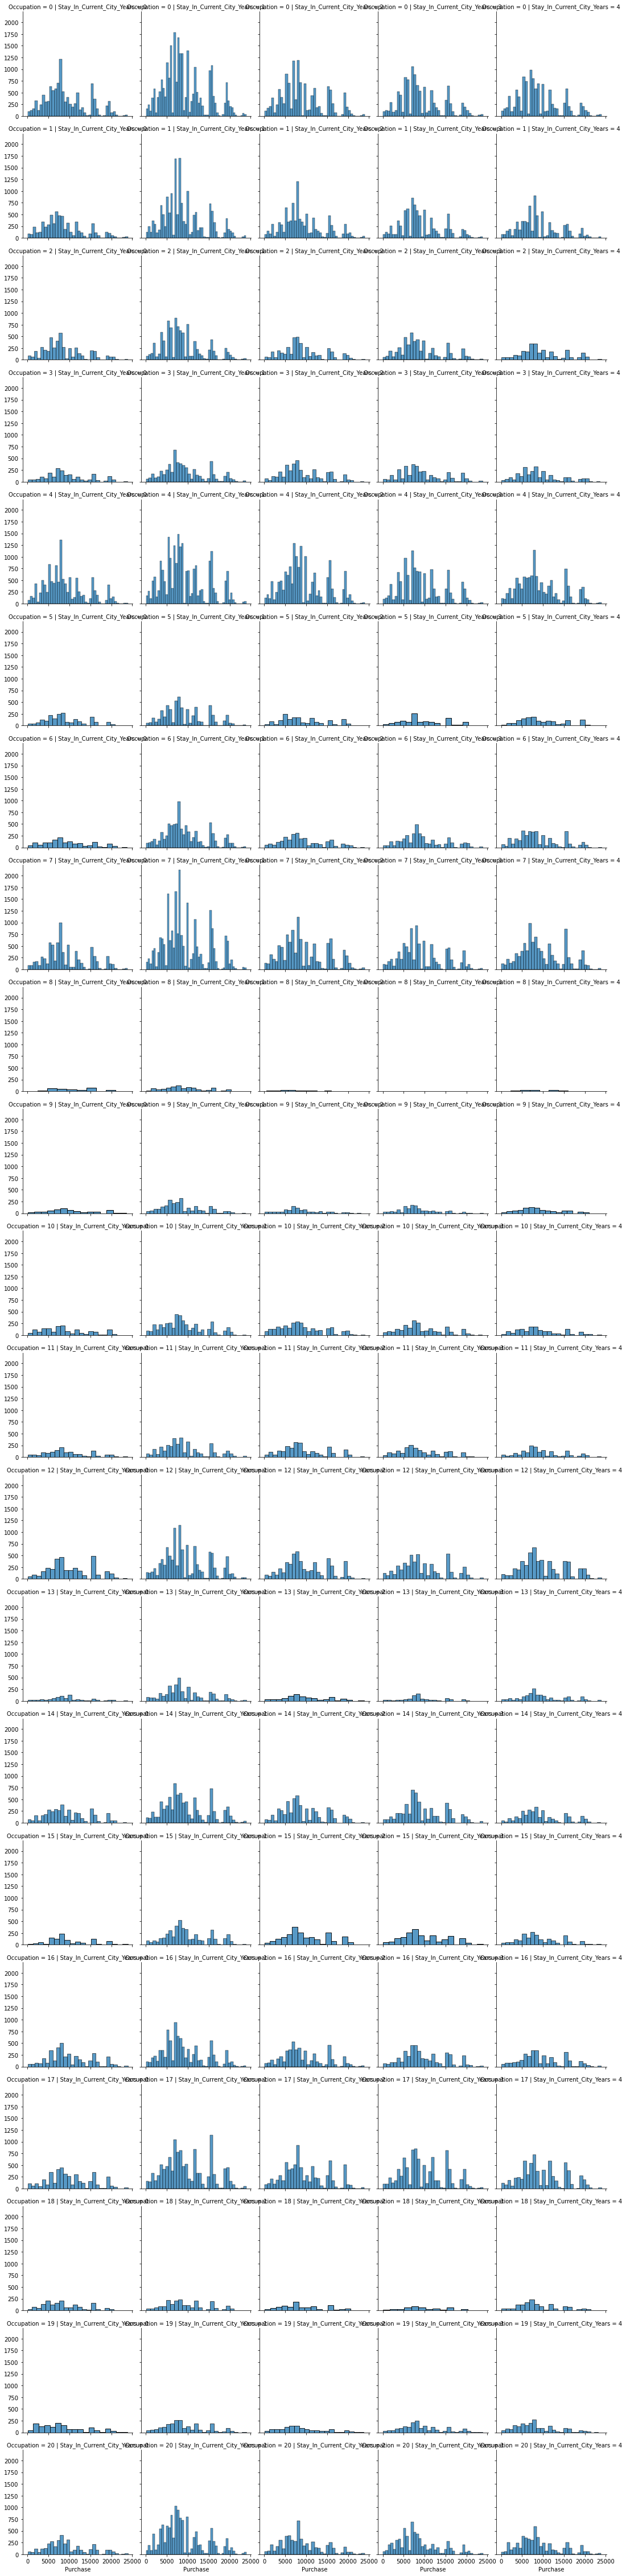

In [50]:
g = sns.FacetGrid(train,col="Stay_In_Current_City_Years",row="Occupation")
g.map(sns.histplot, "Purchase")